# Laboratório #3

### Instruções

1. Antes de começar, você deve clicar na opção "Copiar para o Drive" na barra superior do Colab. Depois de clicar nela, verifique se você está trabalhando nessa versão do notebook para que seu trabalho seja salvo.
2. Quando você terminar os exercícios do laboratório, vá ao menu do Colab ou Jupyter e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb. 
    * Este deve ser o arquivo que você irá entregar.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
3. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este laboratório e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.
4. Não se esqueça de colocar seu **nome** e **matrícula** na célula de texto abaixo.

**Nome**:

**Matrícula**:

## Exercícios

#### 1)  Neste exercício, você irá usar o regressor logístico implementado abaixo para encontrar os pesos da função hipótese de classificação, calcular os erros de treinamento e validação, plotar as regiões de decisão e a matriz de confusão.

1. Execute a célula abaixo e analise a figura gerada. A figura mostra os exemplos de duas classes.

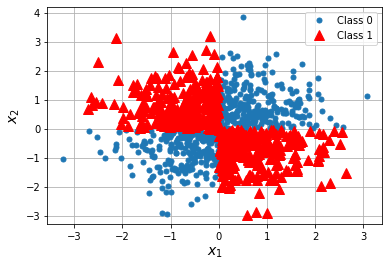

In [2]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.special import expit
import seaborn as sns

# Reset the PN sequence generator.
seed = 42
np.random.seed(seed)

# Number of examples.
N = 1000

# Generating the two classes.
X = np.random.randn(N, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), dtype=float)

# Plotting the two classes.
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
fig = plt.figure()
plt.plot(X[idx0,0], X[idx0,1], '.', markersize=10, label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'r^', markersize=10, label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

2. Execute a célula abaixo para definir a classe que implementa o regressor logístico.

In [3]:
class LogisticRegressorWithGD():
    '''Logistic regressor with gradient descent.'''
    
    def __init__(self, alpha=0.1, numEpochs=1):
        '''Construtor da classe logisticRegressorWithGD.'''
        # Incialização dos atributos da classe.
        self.alpha = alpha
        self.numEpochs = numEpochs
        self.a = 0
        self.a_min = 0

    def hypothesis(self, X):
        '''Função hipótese.'''
        # Função discriminante
        g = X.dot(self.a)
        # Função de limiar de decisão sigmóide.
        h = expit(g)
        return h

    def predict(self, X):
        '''Função que classifica (predição) os exemplos de entrada.'''
        h = self.hypothesis(X)
        # Loop usado para quantizar os valores de saída da função hipótese.
        c = np.zeros((len(h), 1))
        for i in range(0, len(h)):
            if(h[i] >= 0.5):
                c[i,0] = 1.0
        return c

    def error_function(self, X, y, eps=1e-7):
        '''Função usada para calcular o erro médio cometido pelo classificador.'''
        h = self.hypothesis(X)
        error = -(1/len(y))*np.sum(y*(np.log(h+eps)) + (1-y)*(np.log((1-h)+eps)))
        return error

    def fit(self, X_train, y_train, X_test, y_test):
        '''Gradient descent solution.'''

        # Number of examples.
        N = len(y_train)

        # Reshaping into column vectors.
        y_train = y_train.reshape(N, 1)
        y_test = y_test.reshape(len(y_test), 1)

        # Random initialization of parameters.
        self.a = np.random.randn(X_train.shape[1], 1)

        # Create array for storing error values.
        Jgd = np.zeros(self.numEpochs+1)
        Jgd_v = np.zeros(self.numEpochs+1)

        # Calculate initial error.
        Jgd[0] = self.error_function(X_train, y_train)
        Jgd_v[0] = self.error_function(X_test, y_test)

        # Gradient-descent loop.
        minimum_val_error = float("inf")
        iteration = 0
        while iteration < self.numEpochs:
            # Update weights.
            gradients = -(1/N)*X_train.T.dot(y_train - self.hypothesis(X_train))
            self.a = self.a - self.alpha*gradients

            # Calculating training and validation errors.
            Jgd[iteration+1] = self.error_function(X_train, y_train)
            Jgd_v[iteration+1] = self.error_function(X_test, y_test)

            # Early-stop: store weights for the smallest error ever.
            if(Jgd_v[iteration+1] < minimum_val_error):
                minimum_val_error = Jgd_v[iteration+1]
                self.a_min = self.a

            # Update iteration number.
            iteration = iteration + 1

        return Jgd, Jgd_v, iteration, self.a_min, minimum_val_error, self.a

3. Analise o código do método `fit` da classe `logisticRegressorWithGD` definida acima e responda qual é a versão de gradiente descendente implementado neste método.

**DICA**
+ Verifique a quantidade de exemplos de treinamento utilizados para se atualizar os pesos da função hipótese.

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

4. Divida o conjunto total de exemplos em 70% para treinamento e 30% para validação. Configure o parâmetro `random_state` da função `train_test_split` com a variável `seed` definda no item 1 deste exercício.

In [1]:
# Digite aqui o código do exercício.

5. O polinômio que deve ser usado como função discriminante neste exercício é mostrado na sequência:

$$g(\textbf{x}) = \hat{a}_0 + \hat{a}_1x_1x_2.$$

Esta é a equação da **hipérbole retangular**, com suas assíntotas coincidentes com os eixos coordenados.

Agora, de posse da função discriminante que separa as duas classes, altere as matrizes de atributos de treinamento e validação para que elas implementem esta função discriminante.

**DICA**

+ Lembre-se que a matriz de atributos, $X$, gerada no item 1 deste exercício, contém duas colunas, sendo que cada coluna representa um dos atributos, $x_1$ e $x_2$, respectivamente. Portanto, você precisa multiplicar as duas colunas da matriz para obter o formato necessário para a função discriminante.
+ Para resolver este item, se baseie no código do seguinte exemplo: [logistic_regression_with_gradient_descent.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/logistic_regression_with_gradient_descent.ipynb).

In [2]:
# Digite aqui o código do exercício.

6. Treine o classificador usando uma instância da classe `LogisticRegressorWithGD`. Altere os valores dos parâmetros `alpha` e `numEpochs` até que a acurácia seja igual a 100%.

**DICA**

+ Altere o valor de `alpha` da seguinte forma: `0.01, 0.03, 0.1, 0.3, 1.0`.
+ Altere o valor de `numEpochs` de 1000 até no máximo 100000 épocas.
+ Para resolver este item, se baseie no código do seguinte exemplo: [logistic_regression_with_gradient_descent.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/logistic_regression_with_gradient_descent.ipynb).

In [3]:
# Digite aqui o código do exercício.

7. Crie um gráfico que mostre os erros de treinamento e validação em função das iterações de aprendizagem.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [logistic_regression_with_gradient_descent.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/logistic_regression_with_gradient_descent.ipynb).

In [4]:
# Digite aqui o código do exercício.

8. Crie uma figura mostrando as regiões de decisão após a quantização da saída da função hipótese de classificação.

**DICA**

+ A saída quantizada do regressor logístico é obtida com o método `predict`.
+ A matriz de atributos criada para plotar as regiões de decisão também deve ter a mesma forma que as matrizes de atributos criadas para o treinamento e validação.
+ Para resolver este item, se baseie no código do seguinte exemplo: [logistic_regression_with_gradient_descent.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/logistic_regression_with_gradient_descent.ipynb).

In [5]:
# Digite aqui o código do exercício.

9. Plote a matriz de confusão deste classificador.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [logistic_regression_with_gradient_descent.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/logistic_regression_with_gradient_descent.ipynb).

In [6]:
# Digite aqui o código do exercício.

10. Analise a matriz de confusão e responda:

+ Quantos negativos falsos ocorreram?
+ Quantos positivos falsos ocorreram?
+ Quantos positivos verdadeiros ocorram?
+ Quantos negativos verdadeiros ocorram?

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [logistic_regression_with_gradient_descent.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/logistic_regression_with_gradient_descent.ipynb).

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

#### 2)  Neste exercício, você irá usar o regressor logístico da biblioteca SciKit-Learn  para resolver o problema de classificação do exercício anterior.

1. Execute a célula abaixo e analise a figura gerada. A figura mostra os exemplos de duas classes.

**DICAS**

+ Notem que o conjunto de dados já é dividido em conjuntos de treinamento e validação na célula abaixo.

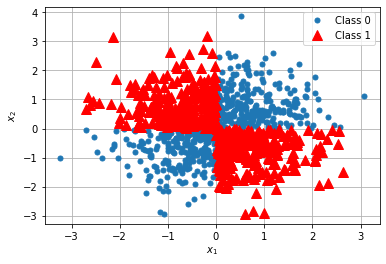

In [9]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.special import expit
import seaborn as sns

# Reset the PN sequence generator.
seed = 42
np.random.seed(seed)

# Number of examples.
N = 1000

# Generating the two classes.
X = np.random.randn(N, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), dtype=float)

# Plotting the two classes.
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
fig = plt.figure()
plt.plot(X[idx0,0], X[idx0,1], '.', markersize=10, label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'r^', markersize=10, label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

# Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

2. O polinômio que deve ser usado como função discriminante neste exercício é mostrado na sequência:

$$g(x) = \hat{a}_0 + \hat{a}_1x_1x_2.$$

Agora, de posse da função discriminante que separa as duas classes, altere as matrizes de atributos de treinamento e validação para que elas implementem esta função discriminante.

**DICA**

+ Lembre-se que a matriz de atributos, $X$, gerada no item 1 deste exercício, contém duas colunas, sendo que cada coluna representa um dos atributos, $x_1$ e $x_2$, respectivamente. Portanto, você precisa multiplicar as duas colunas da matriz para obter o formato necessário para a função discriminante.
+ Para resolver este item, se baseie no código do seguinte exemplo: [logistic_regression_with_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/logistic_regression_with_scikit_learn.ipynb).

In [7]:
# Digite aqui o código do exercício.

3. Treine o classificador logístico da biblioteca SciKit-Learn usando uma instância da classe `LogisticRegression`. Após o treinamento, apresente a acurácia obtida por este classificador para o conjunto de validação.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [logistic_regression_with_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/logistic_regression_with_scikit_learn.ipynb).
+ Você não precisa importar a classe, pois ela já foi importada no item 1 deste exercício.
+ Configure o parâmetro `penalty` com a string `none`, assim como no notebook de exemplo.
    + O parâmetro `penalty` habilita a **regularização** do modelo, ou seja, a penalização de seus pesos.
+ Configure o parâmetro `fit_intercept` com o valor booleano `False`, assim como no notebook de exemplo, caso você tenha concatenado manualmente o vetor do atributo de *bias* às matrizes de atributos de treinamento e validação no item anterior.

In [8]:
# Digite aqui o código do exercício.

4. Crie uma figura mostrando as regiões de decisão após a quantização da saída da função hipótese de classificação.

**DICA**

+ A saída quantizada do regressor logístico é obtida com o método `predict`.
+ A matriz de atributos criada para plotar as regiões de decisão também deve ter a mesma forma que as matrizes de atributos criadas para o treinamento e validação.
+ Para resolver este item, se baseie no código do seguinte exemplo: [logistic_regression_with_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/logistic_regression_with_scikit_learn.ipynb).

In [9]:
# Digite aqui o código do exercício.

5. Plote a matriz de confusão deste classificador.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [logistic_regression_with_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/logistic_regression_with_scikit_learn.ipynb).

In [10]:
# Digite aqui o código do exercício.

#### 3)  Neste exercício, você irá comparar os resultados dos erros de treinamento e validação obtidos com a regra de aprendizado do perceptron e com o gradiente descendente através do regressor logístico.

1. Execute a célula abaixo e analise a figura gerada. A figura mostra os exemplos de duas classes que se sobrepõem.

Assim como no exercício do laboratório 2, usaremos a equação de uma reta como sendo a equação discriminante, $g(\textbf{x})$.

**DICAS**:

+ O conjunto total de amostras já foi dividido em conjuntos de treinamento e validação.
+ As matrizes de treinamento e validação já foram criadas seguindo o formato mais apropriado para a função discriminante, que no caso deste exercício é o de uma reta.

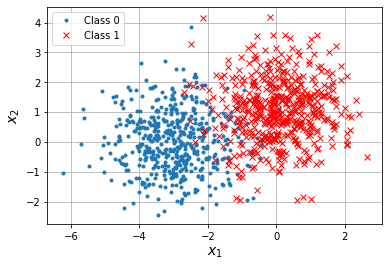

In [1]:
# Import all necessary libraries.
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from scipy.special import expit
from sklearn.metrics import accuracy_score

# Define a seed.
seed = 42
# Reset the PN sequence generator.
np.random.seed(seed)
random.seed(seed)

# Number of examples.
N = 1000

# Create a 2-class dataset for classification.
centers = [[-3.0, 0], [0, 1.0]]
X, y = make_blobs(n_samples=N, centers=centers, random_state=seed)

# Plot the classes.
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
fig = plt.figure()
plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

# Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# The following two matrices implement the equation of a line.
# Add bias to feature matrix.
X_train = np.c_[np.ones((len(y_train), 1)), X_train]

# Add bias to feature matrix.
X_test = np.c_[np.ones((len(y_test), 1)), X_test]

2. Execute a célula abaixo e analise as figuras geradas. A primeira figura mostra o gráfico com os erros de treinamento e validação em função das iterações de treinamento para o **regressor logístico**. A segunda figura apresenta as regiões de decisão encontradas pelo **regressor logístico** após a quantização de sua saída (fronteira de decisão rígida).

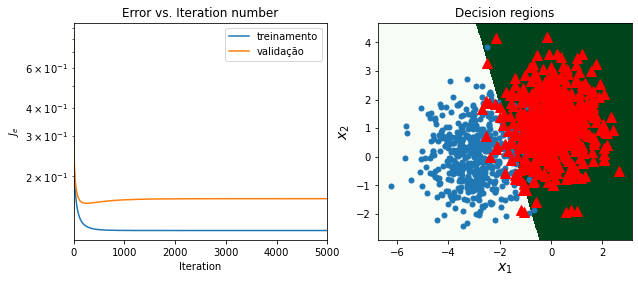

minimum_val_error 0.15244919514437877
Acurácia: 0.9366666666666666


In [7]:
# learning rate.
alpha = 0.6

# Maximum number of iterations.
numEpochs = 5000

# Instantiate Logistic classifier.
classifier = LogisticRegressorWithGD(alpha, numEpochs)

# Train the model.
Jgd, Jgd_v, iteration, a_min, minimum_val_error, a = classifier.fit(X_train, y_train, X_test, y_test)

# Create figure.
plt.figure(figsize=(10,4))

# Plot errors.
ax = plt.subplot(1, 2, 1)
plt.plot(np.arange(0, iteration), Jgd[0:iteration], label='treinamento')
plt.plot(np.arange(0, iteration), Jgd_v[0:iteration], label='validação')
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('$J_e$', fontsize=14)
plt.title('Error vs. Iteration number')
plt.legend()
plt.grid()

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# This attribute matrix must also follow the same shape 
# as the one created for the training.
attribute_matrix = np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()]

Z = classifier.predict(attribute_matrix)

# Put the result into a color plot.
Z = Z.reshape(xx.shape)

ax = plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Greens, shading='auto')

# Plot also the training points.
plt.plot(X[idx0,0], X[idx0,1], '.', markersize=10, label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'r^', markersize=10, label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision regions')
plt.grid()

plt.show()

# Print smallest error.
print('minimum_val_error', minimum_val_error)

# Calculate accuracy of class predictions.
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Acurácia:',acc)

3. Compare o gráfico de erro acima com o gráfico dos erros de treinamento e validação em função das iterações de aprendizagem obtidos com a regra de atualização do perceptron no item 6 do exercício 2 do laboratório #2. Agora, responda:

    + Qual a diferença entre estes dois resultados. **Justifique sua resposta.**

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**